<br>Datos disponibles:
<br>PayerId Id de la empresa que va a realizar el pago
<br>ReceiverId Id de la empresa que recibe el pago
<br>invoiceId Id de la factura pagada
<br>paidAt Fecha de pago
<br>amount Monto de la factura pagada
<br>amountfinancedByXepelin Monto de la factura que Xepelin financió al pagador para realizar la
transacción
<br>Status Estado de cada transacción Pagada, Procesando, Fallida.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.getcwd()

'C:\\Users\\INTEL\\Documents\\Xepelin'

In [8]:
data = pd.read_csv('data_test.csv')
data.columns = data.columns.str.lower()

In [9]:
print(data.head() , '\n\n',data.dtypes)

   payerid  receiverid  invoiceid               paidat     amount  \
0       53          10   18660729  2022-04-23 00:00:00    1490.46   
1       93          11   18660730  2021-11-20 00:00:00    6418.28   
2      122          12   18660731  2021-10-19 00:00:00   27979.20   
3       85          13   18660732  2021-11-13 00:00:00  183070.77   
4       87          14   18660733  2022-03-23 00:00:00   20532.00   

   amountfinancedbyxepelin status  
0                     0.00   PAID  
1                   624.48   PAID  
2                 10520.15   PAID  
3                 79421.63   PAID  
4                 20532.00   PAID   

 payerid                      int64
receiverid                   int64
invoiceid                    int64
paidat                      object
amount                     float64
amountfinancedbyxepelin    float64
status                      object
dtype: object


In [61]:
data.isna().sum()

payerid                      0
receiverid                   0
invoiceid                    0
paidat                     308
amount                       0
amountfinancedbyxepelin      0
status                       0
iddate                       0
month                        0
year                         0
dtype: int64

In [63]:
data['invoiceid'].duplicated().sum()

0

In [11]:
data['paidat'] = pd.to_datetime(data['paidat'])

In [59]:
data['month'] = data['paidat'].dt.month.fillna(0).astype(int).astype(str)
data['year'] = data['paidat'].dt.year.fillna(0).astype(int).astype(str)
data['month'] = np.where(data['month'].str.len() < 2 , '0'+data['month'],data['month'])
data['iddate'] = data['year'] + data['month']
print(data['iddate'])

0       202204
1       202111
2       202110
3       202111
4       202203
         ...  
1195       000
1196       000
1197       000
1198       000
1199       000
Name: iddate, Length: 1200, dtype: object


Solo hay failed y processing en status, hay pocas transacciones en mayo, seran todas las pendientes de este mes ?

In [67]:
data.groupby(['iddate','status']).agg({'invoiceid' : 'count','amount':'sum','amountfinancedbyxepelin':'sum' }).reset_index()

,iddate,status,invoiceid,amount,amountfinancedbyxepelin
0,000,FAILED,39,2610972.74,2435517.73
1,000,PROCESSING,269,3380613.38,2011203.00
2,202110,PAID,5,35902.64,10520.15
3,202111,PAID,13,268349.19,119352.51
4,202112,PAID,17,753946.49,592831.07
5,202201,PAID,107,7283045.52,5219511.13
6,202202,PAID,183,7100660.51,4485712.42
7,202203,PAID,225,5765920.25,2344379.98
8,202204,PAID,269,5042399.69,3057870.38
9,202205,PAID,73,1180788.62,714735.77


Hay transacciones intermedias que estan en processing viendo los correlativos del invoiceid

In [223]:
data[(data['payerid']==10) | (data['receiverid']==10)]

,payerid,receiverid,invoiceid,paidat,amount,amountfinancedbyxepelin,status,iddate,month,year,iddate_2
0,53,10,18660729,2022-04-23,1490.46,0.00,PAID,202204,04,2022,202204
40,10,16,18660769,2022-01-10,1461.06,0.00,PAID,202201,01,2022,202201
167,189,10,18660896,2022-04-24,1490.46,0.00,PAID,202204,04,2022,202204
186,10,42,18660915,2022-04-23,4035.06,0.00,PAID,202204,04,2022,202204
200,25,10,18660929,2022-01-17,1447.86,0.00,PAID,202201,01,2022,202201
367,59,10,18661096,2022-04-20,1490.26,0.00,PAID,202204,04,2022,202204
400,49,10,18661129,2022-04-10,1139.86,0.00,PAID,202204,04,2022,202204
567,87,10,18661296,2022-03-19,1723.86,0.00,PAID,202203,03,2022,202203
600,58,10,18661329,2022-03-22,16240.00,5485.98,PAID,202203,03,2022,202203
767,115,10,18661496,NaT,1867.60,0.00,PROCESSING,000,00,0,202205


Buscamos el miximo y maximo invoiceid por mes, para intentar completar este dato y tener una idea de a que mes corresponden estas transacciones

In [92]:
aber =data.groupby(['iddate','status']).agg({'invoiceid' : ['max','min']}).reset_index()

In [93]:
new_keys=[]
for element in aber.columns:
    key,agg = element
    if agg=='':
        new=key
    else:
        new=key+'_'+agg
    new_keys.append(new)
print(new_keys)

['iddate', 'status', 'invoiceid_max', 'invoiceid_min']


In [94]:
aber.columns = new_keys

In [95]:
aber.columns

Index(['iddate', 'status', 'invoiceid_max', 'invoiceid_min'], dtype='object')

In [99]:
aber = aber[aber['status']=='PAID']
aber.drop('status',inplace=True,axis=1)

Los maximos y minimos del id de transaccion se traslapan, por lo que no se podria completar

In [101]:
aber

,iddate,invoiceid_max,invoiceid_min
2,202110,18660744,18660731
3,202111,18660849,18660730
4,202112,18661430,18660740
5,202201,18661881,18660748
6,202202,18661893,18660782
7,202203,18661829,18660733
8,202204,18661899,18660729
9,202205,18661443,18660863


Supuesto : Todas las transacciones pendientes se van a materializar en el 2022 Mayo.
Nos quedamos solo tansacciones con status paid or processing

In [113]:
data['iddate_2'] = np.where(data['paidat'].isna(),'202205',data['iddate'])
data_2 = data[~data['status'].isin(['FAILED']) ]

In [114]:
data_2

,payerid,receiverid,invoiceid,paidat,amount,amountfinancedbyxepelin,status,iddate,month,year,iddate_2
0,53,10,18660729,2022-04-23,1490.46,0.00,PAID,202204,04,2022,202204
1,93,11,18660730,2021-11-20,6418.28,624.48,PAID,202111,11,2021,202111
2,122,12,18660731,2021-10-19,27979.20,10520.15,PAID,202110,10,2021,202110
3,85,13,18660732,2021-11-13,183070.77,79421.63,PAID,202111,11,2021,202111
4,87,14,18660733,2022-03-23,20532.00,20532.00,PAID,202203,03,2022,202203
...,...,...,...,...,...,...,...,...,...,...,...
1156,151,82,18661885,NaT,1490.26,0.00,PROCESSING,000,00,0,202205
1157,136,55,18661886,NaT,2678.40,0.00,PROCESSING,000,00,0,202205
1163,191,118,18661892,2022-02-23,1147.86,0.00,PAID,202202,02,2022,202202
1164,171,125,18661893,2022-02-23,1792.46,0.00,PAID,202202,02,2022,202202


In [166]:
groupby_month = data_2.groupby(['iddate_2']).agg({'invoiceid' : 'count','amount':'sum','amountfinancedbyxepelin':'sum' }).reset_index()
print(groupby_month)

  iddate_2  invoiceid      amount  amountfinancedbyxepelin
0   202110          5    35902.64                 10520.15
1   202111         13   268349.19                119352.51
2   202112         17   753946.49                592831.07
3   202201        107  7283045.52               5219511.13
4   202202        183  7100660.51               4485712.42
5   202203        225  5765920.25               2344379.98
6   202204        269  5042399.69               3057870.38
7   202205        342  4561402.00               2725938.77


Con esto, vemos que, la cantidad de transacciones mensuales, sigue manteniendo la tendencia a creecr que tenia en los meses previos, asi como el monto que mueve Xepelin

<AxesSubplot:xlabel='iddate_2'>

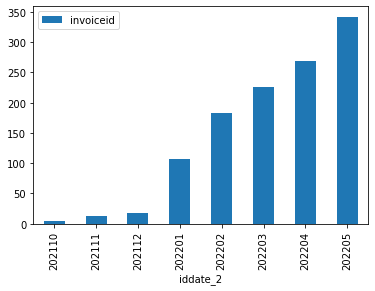

In [130]:
groupby_month[['iddate_2','invoiceid']].plot.bar(x='iddate_2')


<AxesSubplot:xlabel='iddate_2'>

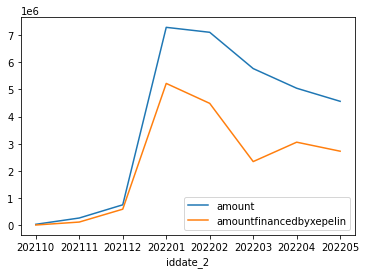

In [132]:
groupby_month[['iddate_2','amount','amountfinancedbyxepelin']].plot.line(x='iddate_2')

Es claro que, a partir del 2022, el volumen de transacciones, tanto en cantidad como en monto son mayores, el numero de transacciones se viene incrementando, pero el monto, reduciendo

In [219]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [135]:
groupby_month.dtypes

iddate_2                    object
invoiceid                    int64
amount                     float64
amountfinancedbyxepelin    float64
dtype: object

In [168]:
groupby_month['iddate_2_num'] = groupby_month['iddate_2'].astype(int)

In [184]:
X_train = groupby_month[groupby_month['iddate_2_num']>=202201]['iddate_2_num']
y_train = groupby_month[groupby_month['iddate_2_num']>=202201]['amount']

In [185]:
reg = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train)

R2

In [220]:
r2_score(y_train , reg.predict(X_train.values.reshape(-1, 1)))

0.9559130232213517

In [174]:
print(reg.coef_ , reg.intercept_)

[-750154.786] 151689498879.15204


In [208]:
print(type(X_train), type(y_train))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [210]:
X_y = pd.concat([X_train,y_train],axis=1)

In [211]:
X_y = X_y.append({'iddate_2_num':202206,}, ignore_index=True)

C:\Users\INTEL\AppData\Local\Temp\ipykernel_10524\1947115815.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_y = X_y.append({'iddate_2_num':202206,}, ignore_index=True)


In [214]:
X_y['amount_predic'] = reg.predict(X_y['iddate_2_num'].values.reshape(-1,1))

In [215]:
X_y

,iddate_2_num,amount,amount_predic
0,202201,7283045.52,7.450995e+06
1,202202,7100660.51,6.700840e+06
2,202203,5765920.25,5.950686e+06
3,202204,5042399.69,5.200531e+06
4,202205,4561402.00,4.450376e+06
5,202206,NaN,3.700221e+06


<AxesSubplot:xlabel='iddate_2_num'>

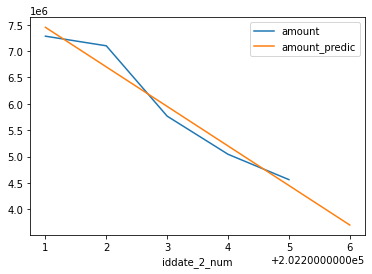

In [218]:
X_y[['iddate_2_num','amount','amount_predic']].plot.line(x='iddate_2_num')

El estimado de volumen que tendría Xepelin para Junio sería : aprox : '3700221.23599243